<a href="https://colab.research.google.com/github/Minhluu2911/Lenet-AlexNet-VGG-From-Scratch/blob/main/Lenet_AlexNet_VGG_GoogleNet_ResNet_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Minhluu2911/Lenet_AlexNet_VGG_GoogleNet_ResNet_DenseNet-From-Scratch

In [ ]:
import sys
sys.path.append('/content/Lenet_AlexNet_VGG_GoogleNet_ResNet_DenseNet-From-Scratch')
from utilities import *

%matplotlib inline

In [1]:
from utilities import *

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# LeNet (Yan Lecun 1998)
<img src="https://www.philschmid.de/5c4e7f9199730e6bd22aacf8e10d25bd/lenet-5.svg"/>

- First used to classify hand written digits

## LeNet-5 model

In [ ]:
from LeNet5 import *

## Training with Mnist data

In [8]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = load_mnist()  
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_val:  '  + str(X_val.shape))
print('Y_val:  '  + str(Y_val.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (50000, 28, 28, 1)
Y_train: (50000, 1)
X_val:  (10000, 28, 28, 1)
Y_val:  (10000, 1)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 1)


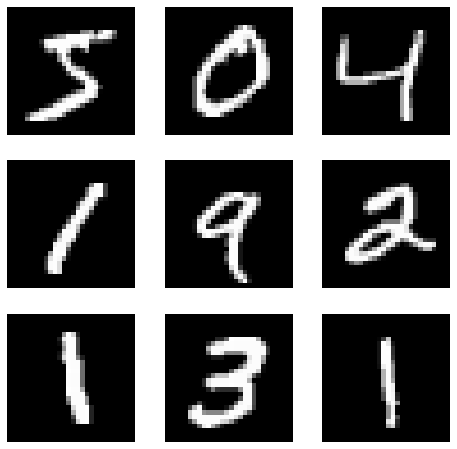

In [9]:
display(X_train, Y_train)

In [10]:
lenet_mnist = LeNet()

In [11]:
lenet_mnist.model.build(X_train.shape)
lenet_mnist.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (50000, 28, 28, 6)        156       
_________________________________________________________________
average_pooling2d (AveragePo (50000, 14, 14, 6)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (50000, 10, 10, 16)       2416      
_________________________________________________________________
average_pooling2d_1 (Average (50000, 5, 5, 16)         0         
_________________________________________________________________
flatten (Flatten)            (50000, 400)              0         
_________________________________________________________________
dense (Dense)                (50000, 120)              48120     
_________________________________________________________________
dense_1 (Dense)              (50000, 84)               1

In [12]:
history = lenet_mnist.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16)

Training Lenet-5 model...
Epoch 1/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3535 - accuracy: 0.9032 - val_loss: 0.1746 - val_accuracy: 0.9503
Epoch 2/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1626 - accuracy: 0.9506 - val_loss: 0.1352 - val_accuracy: 0.9600
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1252 - accuracy: 0.9616 - val_loss: 0.1233 - val_accuracy: 0.9621
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1039 - accuracy: 0.9682 - val_loss: 0.1028 - val_accuracy: 0.9699
Epoch 5/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.0892 - accuracy: 0.9717 - val_loss: 0.0991 - val_accuracy: 0.9707
Epoch 6/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.0782 - accuracy: 0.9757 - val_loss: 0.0961 - val_accuracy: 0.9731
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.0679 - accuracy: 0.9794 -

In [13]:
# Evaluate the model on the test data
lenet_mnist.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9749


Generate predictions for 10000 samples
predictions shape: (10000, 10)


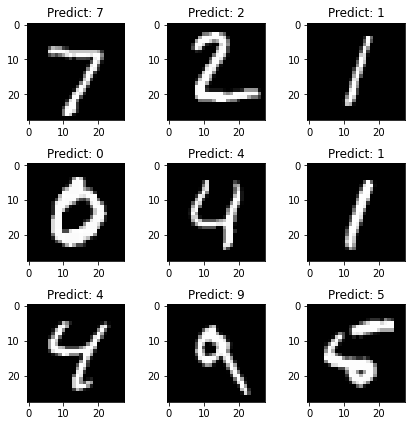

In [14]:
predictions = lenet_mnist.predict(X_test, Y_test, no_show=9)

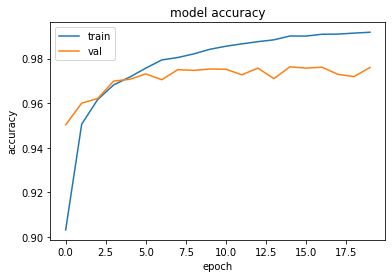

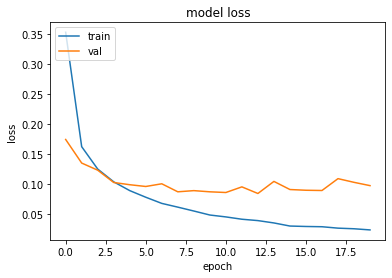

In [15]:
lenet_mnist.plot_result()

## Training with cifar10

In [16]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test), CLASS_NAMES = load_cifar10()  
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_val:  '  + str(X_val.shape))
print('Y_val:  '  + str(Y_val.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (45000, 32, 32, 3)
Y_train: (45000, 1)
X_val:  (5000, 32, 32, 3)
Y_val:  (5000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


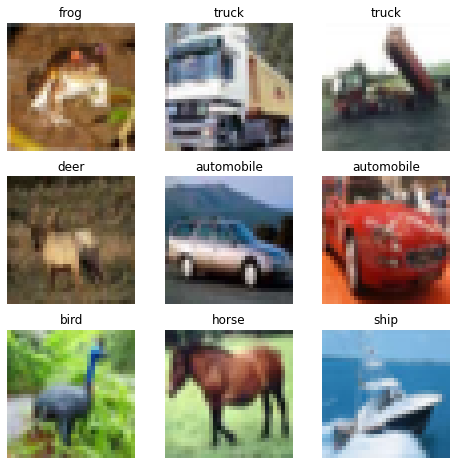

In [17]:
display(X_train, Y_train, CLASS_NAMES=CLASS_NAMES, no_show=9)

In [18]:
lenet_cifar10 = LeNet()

In [19]:
lenet_cifar10.model.build(X_train.shape)
lenet_cifar10.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (45000, 32, 32, 6)        456       
_________________________________________________________________
average_pooling2d_2 (Average (45000, 16, 16, 6)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (45000, 12, 12, 16)       2416      
_________________________________________________________________
average_pooling2d_3 (Average (45000, 6, 6, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (45000, 576)              0         
_________________________________________________________________
dense_3 (Dense)              (45000, 120)              69240     
_________________________________________________________________
dense_4 (Dense)              (45000, 84)              

In [20]:
lenet_cifar10.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16)

Training Lenet-5 model...
Epoch 1/20
2813/2813 [==============================] - 14s 5ms/step - loss: 1.7723 - accuracy: 0.3601 - val_loss: 1.6211 - val_accuracy: 0.4106
Epoch 2/20
2813/2813 [==============================] - 12s 4ms/step - loss: 1.5382 - accuracy: 0.4468 - val_loss: 1.5135 - val_accuracy: 0.4590
Epoch 3/20
2813/2813 [==============================] - 12s 4ms/step - loss: 1.4442 - accuracy: 0.4852 - val_loss: 1.4322 - val_accuracy: 0.4932
Epoch 4/20
2813/2813 [==============================] - 12s 4ms/step - loss: 1.3790 - accuracy: 0.5092 - val_loss: 1.3926 - val_accuracy: 0.5100
Epoch 5/20
2813/2813 [==============================] - 12s 4ms/step - loss: 1.3295 - accuracy: 0.5278 - val_loss: 1.3671 - val_accuracy: 0.5062
Epoch 6/20
2813/2813 [==============================] - 12s 4ms/step - loss: 1.2900 - accuracy: 0.5417 - val_loss: 1.3508 - val_accuracy: 0.5272
Epoch 7/20
2813/2813 [==============================] - 13s 5ms/step - loss: 1.2542 - accuracy: 0.5516 -

In [21]:
# Evaluate the model on the test data
lenet_cifar10.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4141 - accuracy: 0.5217


Generate predictions for 10000 samples
predictions shape: (10000, 10)


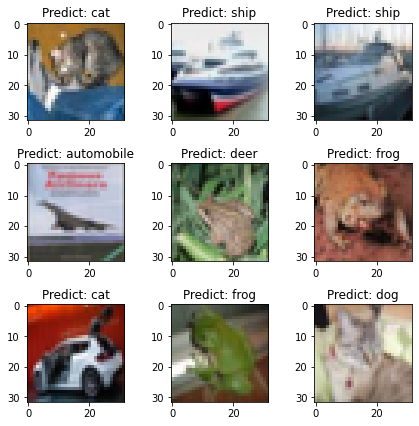

array([[1.4674399e-02, 8.4309004e-02, 1.1258443e-02, ..., 1.9303293e-03,
        5.1075265e-02, 1.5317875e-02],
       [6.1421644e-02, 2.8045434e-01, 1.0434013e-03, ..., 1.5789719e-04,
        3.8970235e-01, 2.6662415e-01],
       [4.9136121e-02, 1.5497729e-01, 2.0699035e-03, ..., 7.8285374e-03,
        7.3952121e-01, 4.3575510e-02],
       ...,
       [3.7952437e-04, 1.1283839e-05, 1.2819083e-02, ..., 1.9556211e-02,
        2.1669166e-03, 1.3086319e-04],
       [1.4877386e-02, 1.0177222e-02, 3.1768572e-01, ..., 1.5006212e-02,
        1.3531810e-02, 4.4011730e-03],
       [1.9510186e-03, 2.4881517e-04, 1.2852194e-02, ..., 8.0704463e-01,
        1.5884119e-03, 1.1911618e-03]], dtype=float32)

In [22]:
lenet_cifar10.predict(X_test, Y_test, CLASS_NAMES=CLASS_NAMES, no_show=9)

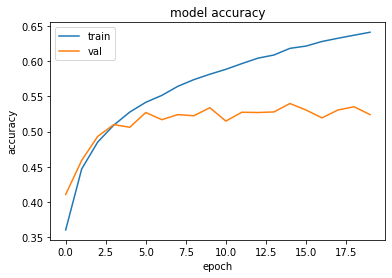

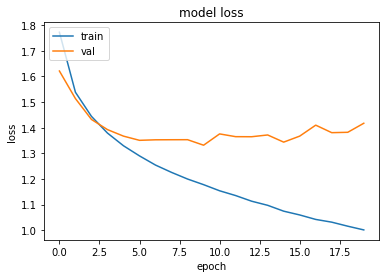

In [23]:
lenet_cifar10.plot_result()

## Reference
- [Document of training and evaluation with the built-in methods in tensorflow](https://www.tensorflow.org/guide/keras/train_and_evaluate#training_evaluation_from_tfdata_datasets)
- [Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

# AlexNet(Alex Krizhevsky 2012)
<img src="https://static.packt-cdn.com/products/9781789956177/graphics/assets/ec08175c-5282-4be2-b6e7-6f2d99272166.png" />

- Similar architecture as LeNet but was deeper, with more filters per layer, and with stacked convolutional layers.

## AlexNet model (padding same)

In [ ]:
from AlexNet import AlexNet

## AlexNet model (padding as paper)

In [ ]:
from AlexNet import AlexNet1

## Training with Cifar10

### Load data

In [37]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test), CLASS_NAMES = load_cifar10()  
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_val:  '  + str(X_val.shape))
print('Y_val:  '  + str(Y_val.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (45000, 32, 32, 3)
Y_train: (45000, 1)
X_val:  (5000, 32, 32, 3)
Y_val:  (5000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


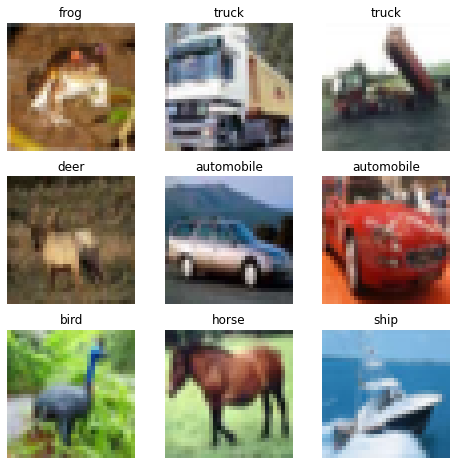

In [38]:
display(X_train, Y_train, CLASS_NAMES=CLASS_NAMES, no_show=9)

### Padding Same

In [41]:
alex = AlexNet()

In [42]:
alex.model.build(X_train.shape)
alex.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_11 (Activation)   (None, 4, 4, 256)        

In [43]:
alex.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16)

Training AlexNet model...
Epoch 1/20
2813/2813 [==============================] - 59s 21ms/step - loss: 1.5204 - accuracy: 0.4440 - val_loss: 1.5431 - val_accuracy: 0.4630
Epoch 2/20
2813/2813 [==============================] - 57s 20ms/step - loss: 1.2377 - accuracy: 0.5562 - val_loss: 1.7151 - val_accuracy: 0.4626
Epoch 3/20
2813/2813 [==============================] - 57s 20ms/step - loss: 1.1074 - accuracy: 0.6079 - val_loss: 1.3332 - val_accuracy: 0.5456
Epoch 4/20
2813/2813 [==============================] - 57s 20ms/step - loss: 1.0038 - accuracy: 0.6436 - val_loss: 1.2440 - val_accuracy: 0.5552
Epoch 5/20
2813/2813 [==============================] - 57s 20ms/step - loss: 0.9250 - accuracy: 0.6732 - val_loss: 1.0459 - val_accuracy: 0.6382
Epoch 6/20
2813/2813 [==============================] - 57s 20ms/step - loss: 0.8525 - accuracy: 0.7006 - val_loss: 1.0180 - val_accuracy: 0.6458
Epoch 7/20
2813/2813 [==============================] - 57s 20ms/step - loss: 0.7900 - accuracy: 0

In [44]:
alex.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.3590 - accuracy: 0.6764


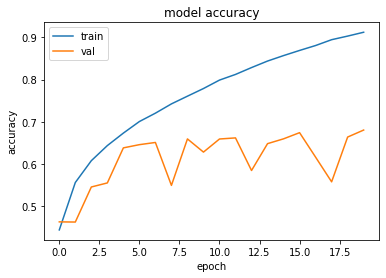

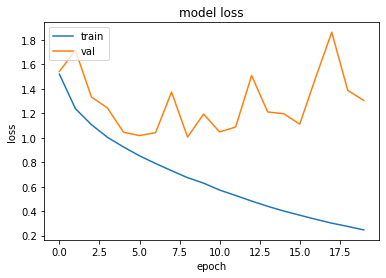

In [45]:
alex.plot_result()

Generate predictions for 10000 samples
predictions shape: (10000, 10)


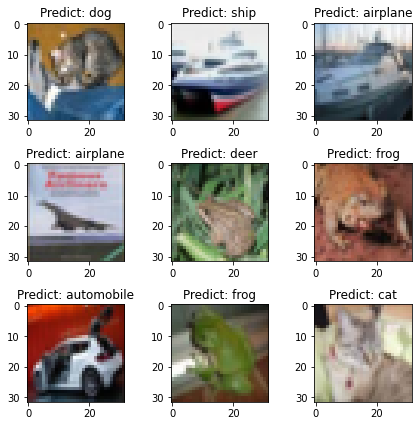

In [46]:
alex.predict(X_test, Y_test, CLASS_NAMES=CLASS_NAMES, no_show=9)
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Padding as paper

In [47]:
alex1 = AlexNet1()

In [48]:
alex1.model.build(X_train.shape)
alex1.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (45000, 228, 228, 3)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (45000, 55, 55, 96)       34944     
_________________________________________________________________
batch_normalization_15 (Batc (45000, 55, 55, 96)       384       
_________________________________________________________________
activation_15 (Activation)   (45000, 55, 55, 96)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (45000, 27, 27, 96)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (45000, 27, 27, 256)      614656    
_________________________________________________________________
batch_normalization_16 (Batc (45000, 27, 27, 256)     

In [49]:
alex1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16)

Training AlexNet model...
Epoch 1/20
2813/2813 [==============================] - 188s 66ms/step - loss: 1.6749 - accuracy: 0.3949 - val_loss: 1.7769 - val_accuracy: 0.3656
Epoch 2/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.4382 - accuracy: 0.4827 - val_loss: 1.4327 - val_accuracy: 0.4684
Epoch 3/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.3134 - accuracy: 0.5336 - val_loss: 1.5613 - val_accuracy: 0.4602
Epoch 4/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.2356 - accuracy: 0.5629 - val_loss: 1.5813 - val_accuracy: 0.4676
Epoch 5/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.1654 - accuracy: 0.5888 - val_loss: 1.3349 - val_accuracy: 0.5360
Epoch 6/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.1017 - accuracy: 0.6102 - val_loss: 1.4765 - val_accuracy: 0.4860
Epoch 7/20
2813/2813 [==============================] - 185s 66ms/step - loss: 1.0501 - accu

In [50]:
alex1.evaluate(X_test, Y_test)

313/313 [==============================] - 11s 35ms/step - loss: 1.3017 - accuracy: 0.6035


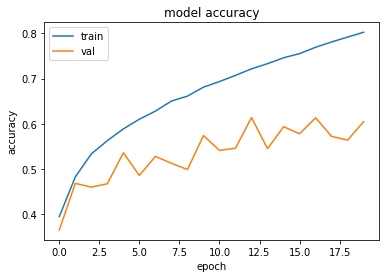

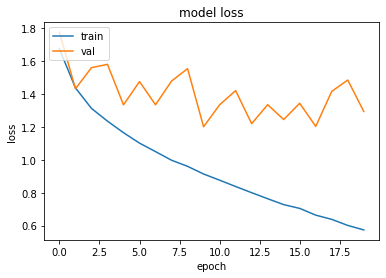

In [51]:
alex1.plot_result()

Generate predictions for 10000 samples
predictions shape: (10000, 10)


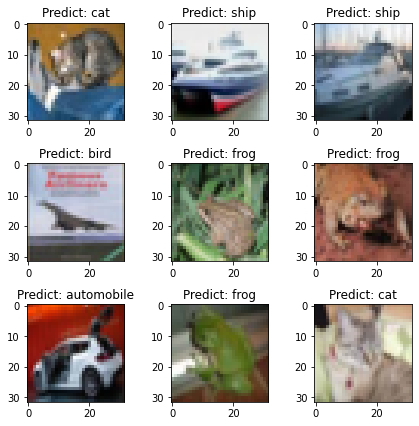

array([[6.8337208e-04, 1.8667217e-02, 5.6593437e-02, ..., 5.9235026e-03,
        5.9030205e-03, 1.6909806e-03],
       [6.3189748e-04, 2.2845948e-03, 2.9542405e-04, ..., 5.9501803e-03,
        9.8951834e-01, 3.9279094e-04],
       [2.2204790e-01, 2.4943287e-02, 2.2866325e-03, ..., 1.4187172e-01,
        4.8761961e-01, 6.1537612e-02],
       ...,
       [3.6128338e-05, 1.2731980e-04, 1.0379689e-03, ..., 4.8749242e-03,
        5.5183022e-04, 2.2558882e-04],
       [1.8143058e-02, 6.3846663e-02, 2.3789568e-02, ..., 1.2429970e-02,
        1.5798483e-02, 4.4571036e-03],
       [7.9007630e-05, 4.5747136e-05, 2.3388939e-05, ..., 9.9609250e-01,
        1.6501536e-04, 2.6089981e-05]], dtype=float32)

In [52]:
alex1.predict(X_test, Y_test, CLASS_NAMES=CLASS_NAMES, no_show=9)

# VGG(K. Simonyan 2014)
<img src="https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png" />

- From LeNet to AlexNet all use Conv-maxpooling but VGG uses a Conv-Conv-Conv sequence in the middle and end of architect VGG. This will make the calculation take longer but the features will still be retained more than using maxpooling after each conv.

## VGG model

In [ ]:
from VGG import VGG

## Training with Cifar10

### Load data

In [54]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test), CLASS_NAMES = load_cifar10()  
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_val:  '  + str(X_val.shape))
print('Y_val:  '  + str(Y_val.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (45000, 32, 32, 3)
Y_train: (45000, 1)
X_val:  (5000, 32, 32, 3)
Y_val:  (5000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


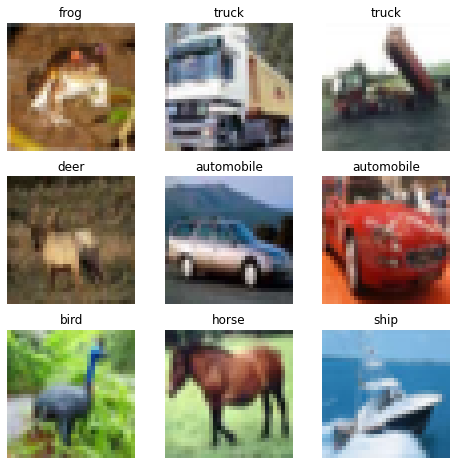

In [55]:
display(X_train, Y_train, CLASS_NAMES=CLASS_NAMES, no_show=9)

### Train model

In [56]:
vgg = VGG()

In [57]:
vgg.model.build(X_train.shape)
vgg.model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)       

In [58]:
vgg.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=16)

Training VGG model...
Epoch 1/20
2813/2813 [==============================] - 170s 59ms/step - loss: 1.4376 - accuracy: 0.4953 - val_loss: 1.2290 - val_accuracy: 0.5622
Epoch 2/20
2813/2813 [==============================] - 166s 59ms/step - loss: 1.0314 - accuracy: 0.6459 - val_loss: 0.9444 - val_accuracy: 0.6798
Epoch 3/20
2813/2813 [==============================] - 165s 59ms/step - loss: 0.8282 - accuracy: 0.7226 - val_loss: 0.7502 - val_accuracy: 0.7468
Epoch 4/20
2813/2813 [==============================] - 165s 59ms/step - loss: 0.6641 - accuracy: 0.7815 - val_loss: 0.7805 - val_accuracy: 0.7384
Epoch 5/20
2813/2813 [==============================] - 168s 60ms/step - loss: 0.5370 - accuracy: 0.8269 - val_loss: 0.7582 - val_accuracy: 0.7464
Epoch 6/20
2813/2813 [==============================] - 167s 59ms/step - loss: 0.4311 - accuracy: 0.8627 - val_loss: 0.6080 - val_accuracy: 0.8048
Epoch 7/20
2813/2813 [==============================] - 167s 59ms/step - loss: 0.3459 - accuracy

In [59]:
vgg.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.7559 - accuracy: 0.7971


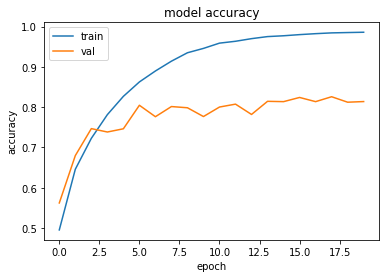

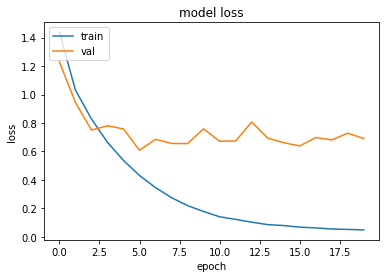

In [60]:
vgg.plot_result()

Generate predictions for 10000 samples
predictions shape: (10000, 10)


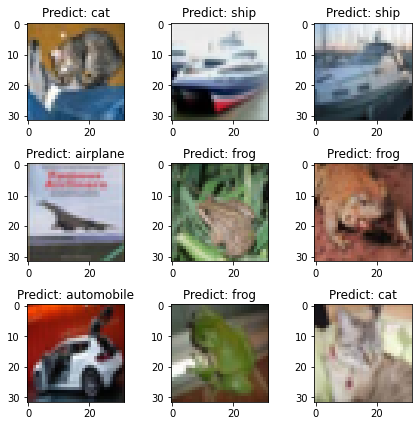

array([[1.43753027e-03, 4.84738685e-03, 2.43127160e-03, ...,
        3.18777957e-03, 2.35103234e-03, 3.52333509e-03],
       [7.30595784e-04, 1.99432275e-03, 2.79335218e-04, ...,
        2.64009897e-04, 9.94739950e-01, 2.59714347e-04],
       [4.88424394e-03, 4.36975947e-03, 2.68284988e-04, ...,
        5.48660115e-04, 9.83991802e-01, 2.67492235e-03],
       ...,
       [1.88903985e-04, 2.60079076e-04, 2.94162356e-03, ...,
        8.18430621e-04, 8.21190406e-05, 9.17748912e-05],
       [1.51682999e-02, 9.63838696e-01, 3.14789708e-04, ...,
        5.98495535e-04, 4.61379706e-04, 2.41851993e-03],
       [6.03224289e-05, 1.98299400e-04, 4.42044839e-05, ...,
        9.98021603e-01, 1.39362455e-05, 9.79009274e-05]], dtype=float32)

In [61]:
vgg.predict(X_test, Y_test, CLASS_NAMES=CLASS_NAMES, no_show=9)